In [14]:
import datetime as dt
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
df = data.DataReader('BTC-USD','yahoo', dt.datetime(2020,12,11), dt.datetime.now())
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-11,18268.453125,17619.533203,18263.929688,18058.904297,27919640985,18058.904297
2020-12-12,18919.550781,18046.041016,18051.320312,18803.656250,21752580802,18803.656250
2020-12-13,19381.535156,18734.332031,18806.765625,19142.382812,25450468637,19142.382812
2020-12-14,19305.099609,19012.708984,19144.492188,19246.644531,22473997681,19246.644531
2020-12-15,19525.007812,19079.841797,19246.919922,19417.076172,26741982541,19417.076172


In [24]:
df1 = data.DataReader('ETH-USD','yahoo', dt.datetime(2020,12,11), dt.datetime.now())
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-11,18268.453125,17619.533203,18263.929688,18058.904297,27919640985,18058.904297
2020-12-12,18919.550781,18046.041016,18051.320312,18803.656250,21752580802,18803.656250
2020-12-13,19381.535156,18734.332031,18806.765625,19142.382812,25450468637,19142.382812
2020-12-14,19305.099609,19012.708984,19144.492188,19246.644531,22473997681,19246.644531
2020-12-15,19525.007812,19079.841797,19246.919922,19417.076172,26741982541,19417.076172


In [25]:
dfo = df.rename_axis('Date').reset_index()
dfo.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-11,18268.453125,17619.533203,18263.929688,18058.904297,27919640985,18058.904297
1,2020-12-12,18919.550781,18046.041016,18051.320312,18803.656250,21752580802,18803.656250
2,2020-12-13,19381.535156,18734.332031,18806.765625,19142.382812,25450468637,19142.382812
3,2020-12-14,19305.099609,19012.708984,19144.492188,19246.644531,22473997681,19246.644531
4,2020-12-15,19525.007812,19079.841797,19246.919922,19417.076172,26741982541,19417.076172


In [26]:
dfo1 = df1.rename_axis('Date').reset_index()
dfo1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-11,560.376709,537.811646,559.679199,545.797363,11098819124,545.797363
1,2020-12-12,573.339417,545.245605,545.578552,568.567322,8534557897,568.567322
2,2020-12-13,593.781250,564.565979,568.609863,589.663208,9070377862,589.663208
3,2020-12-14,590.492981,577.118408,589.782471,586.011169,8125837102,586.011169
4,2020-12-15,596.247742,580.628784,586.021790,589.355591,9326645840,589.355591


In [27]:
dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dfm.head()

,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
0,2020-12-11,18268.453125,17619.533203,18263.929688,18058.904297,27919640985,18058.904297,560.376709,537.811646,559.679199,545.797363,11098819124,545.797363
1,2020-12-12,18919.550781,18046.041016,18051.320312,18803.656250,21752580802,18803.656250,573.339417,545.245605,545.578552,568.567322,8534557897,568.567322
2,2020-12-13,19381.535156,18734.332031,18806.765625,19142.382812,25450468637,19142.382812,593.781250,564.565979,568.609863,589.663208,9070377862,589.663208
3,2020-12-14,19305.099609,19012.708984,19144.492188,19246.644531,22473997681,19246.644531,590.492981,577.118408,589.782471,586.011169,8125837102,586.011169
4,2020-12-15,19525.007812,19079.841797,19246.919922,19417.076172,26741982541,19417.076172,596.247742,580.628784,586.021790,589.355591,9326645840,589.355591


In [28]:
train_dates = dfm
#train_dates = dfm.rename_axis('Date').reset_index()


In [29]:
train_dates = train_dates[['Date']]
train_dates.head()

,Date
0,2020-12-11
1,2020-12-12
2,2020-12-13
3,2020-12-14
4,2020-12-15


In [30]:
train_dates = pd.to_datetime(train_dates["Date"])

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y
0,18268.453125,17619.533203,18263.929688,18058.904297,2.791964e+10,18058.904297,560.376709,537.811646,559.679199
1,18919.550781,18046.041016,18051.320312,18803.656250,2.175258e+10,18803.656250,573.339417,545.245605,545.578552
2,19381.535156,18734.332031,18806.765625,19142.382812,2.545047e+10,19142.382812,593.781250,564.565979,568.609863
3,19305.099609,19012.708984,19144.492188,19246.644531,2.247400e+10,19246.644531,590.492981,577.118408,589.782471
4,19525.007812,19079.841797,19246.919922,19417.076172,2.674198e+10,19417.076172,596.247742,580.628784,586.021790


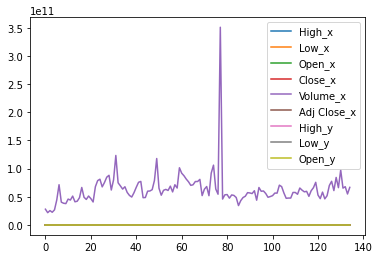

In [31]:
#porque volume y Adj close no nos interesan o son redundantes
cols = list(dfm)[1:10]
df_for_training= dfm[cols].astype(float)

df_for_plot= df_for_training.tail(5000)
df_for_plot.plot.line()
df_for_training.head()

In [32]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

(85, 50, 9)
(85, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10)                800       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
76/76 [==============================] - 3s 17ms/step - loss: 0.1663 - val_loss: 0.0783
Epoch 2/10
76/76 [==============================] - 1s 10ms/step - loss: 0.0545 - val_loss: 0.0855
Epoch 3/10
76/76 [==============================] - 1s 8ms/step - loss: 0.0420 - val_loss: 0.0755
Epoch 4/10
76/76 [==============================] - 1s 9ms/step - loss: 0.0439 - val_loss: 0.0729
Epoch 5/10
76/76 [==============================] - 1s 9ms/step - loss: 0.0383 - val_loss: 0.0742
Epoch 

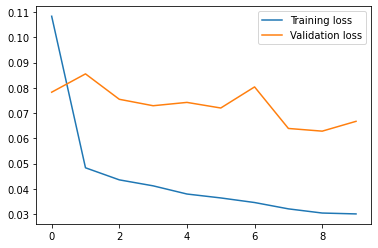

In [33]:
trainX = []
trainY = []

n_future = 1
n_past = 50
variables = df_for_training.shape[1]
idx_target = 3

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainY.append(df_for_training_scaled[i + n_future -1:i + n_future, idx_target])

#for i in range(len(df_for_training_scaled)-n_past-1):
 # trainX.append(df_for_training_scaled[i:i+n_past])
 # trainY.append(df_for_training_scaled[i + n_past , idx_target])

trainX, trainY = np.array(trainX), np.array(trainY)
print(trainX.shape)  
print(trainY.shape)  


# ligeramente modificada para escoger la variable objetivo
#def create_dataset(dataset, look_back_memory=1, idx_target=-1):
#    dataX, dataY = [], []
#        dataX.append(dataset[i:i+look_back_memory])
#    for i in range(len(dataset)-look_back_memory-1):
#        dataY.append(dataset[i+look_back_memory, idx_target])
#    return np.array(dataX), np.array(dataY)

model = Sequential() #initialize model
model.add(LSTM(10, input_shape=(n_past, variables)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

history = model.fit(trainX, trainY, epochs=10,validation_split=0.1, batch_size=1, verbose=1)

#define autoencoder model
#model= Sequential()
#model.add(LSTM(64, activation="relu", input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
#model.add(LSTM(32, activation="relu", return_sequences=False))
#model.add(Dropout(0.2))
#model.add(Dense(trainY.shape[1]))

#model.compile(optimizer="adam", loss="mse")
#model.summary()

#fit model
#history = model.fit(trainX,trainY, epochs=10, batch_size=1, validation_split=0.1, verbose=1)

plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


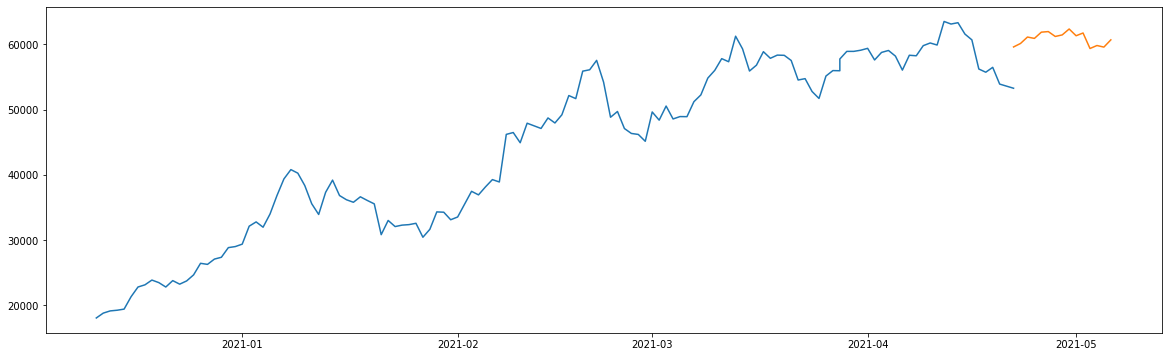

In [34]:
#Forecasting
#start whith the last day in training date and predict future
n_future=15
forecast_period_date= pd.date_range(list(train_dates)[-1],periods=n_future, freq="1d").tolist()

forecast = model.predict(trainX[-n_future:]) #forecast

#perform inverse transformation to rescale back to original range
forecast_copies =np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

#convert timestamp to date
forecast_dates= []
for time_i in forecast_period_date:
  forecast_dates.append(time_i.date())

df_forecast= pd.DataFrame({"Date":np.array(forecast_dates), "Close":y_pred_future})
df_forecast["Date"]=pd.to_datetime(df_forecast["Date"])

original = dfo[["Date", "Close"]]
original["Date"]=pd.to_datetime(original["Date"])
original = original.loc[original["Date"]>= "2020-5-1"]

plt.figure(figsize=(20, 6))
plt.plot(original["Date"], original["Close"])
#plt.figure(figsize=(20, 6))
plt.plot(df_forecast["Date"], df_forecast["Close"])
#print(plt.plot(df_forecast["Date"], df_forecast["Close"]))
#sns.lineplot(df_forecast["Date"], df_forecast["Close"])

In [36]:
df_forecast.head(n=30)

,Date,Close
0,2021-04-22,59596.671875
1,2021-04-23,60130.953125
2,2021-04-24,61116.410156
3,2021-04-25,60907.054688
4,2021-04-26,61865.230469
5,2021-04-27,61952.054688
6,2021-04-28,61204.609375
7,2021-04-29,61441.808594
8,2021-04-30,62349.136719
9,2021-05-01,61314.250000
